***
### Dependencies:
This project code is written using
- tensorflow 2.6.0
- numpy 1.21.5

Older versions of tensorflow might not be able to execute the code properly
***

In [1]:
print("Importing the libraries...")
import warnings
from IPython.display import clear_output
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            plot_confusion_matrix)

import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
clear_output(wait=True)
print("Libraries are imported.")

if not tf.__version__  == "2.6.0":
    warnings.warn(f"Tensorflow version {tf.__version__} is not compatible with '2.6.0'. Conflicts might occure while running the code")
if not np.__version__  == "1.21.5":
    warnings.warn(f"Numpy version {np.__version__} is not compatible with '1.21.5'. Conflicts might occure while running the code")

Libraries are imported.


C:\Users\farza\AppData\Local\Temp\ipykernel_7840\2716199036.py:20: UserWarning: Numpy version 1.23.5 is not compatible with '1.21.5'. Conflicts might occure while running the code
  warnings.warn(f"Numpy version {np.__version__} is not compatible with '1.21.5'. Conflicts might occure while running the code")


In [2]:
# Loading the data
mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
print("Shape of x_train_full before reshaping", x_train_full.shape)
print("Shape of y_train_full before reshaping", x_train_full.shape)
print("Shape of x_test before reshaping", x_train_full.shape)
print("Shape of y_test before reshaping", x_train_full.shape)
print("\nReshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)")
print("canal = 1 => For gray scale")
x_train_full = x_train_full.reshape(x_train_full.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print("\nShape of x_train_full after reshaping", x_train_full.shape)
print("Shape of y_train_full after reshaping", x_train_full.shape)
print("Shape of x_test after reshaping", x_train_full.shape)
print("Shape of y_test after reshaping", x_train_full.shape)

Shape of x_train_full before reshaping (60000, 28, 28)
Shape of y_train_full before reshaping (60000, 28, 28)
Shape of x_test before reshaping (60000, 28, 28)
Shape of y_test before reshaping (60000, 28, 28)

Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
canal = 1 => For gray scale

Shape of x_train_full after reshaping (60000, 28, 28, 1)
Shape of y_train_full after reshaping (60000, 28, 28, 1)
Shape of x_test after reshaping (60000, 28, 28, 1)
Shape of y_test after reshaping (60000, 28, 28, 1)


c:\Users\farza\anaconda3\envs\ieso_env_v9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The image shows that we are not dealing with the problem of imbalance dataset


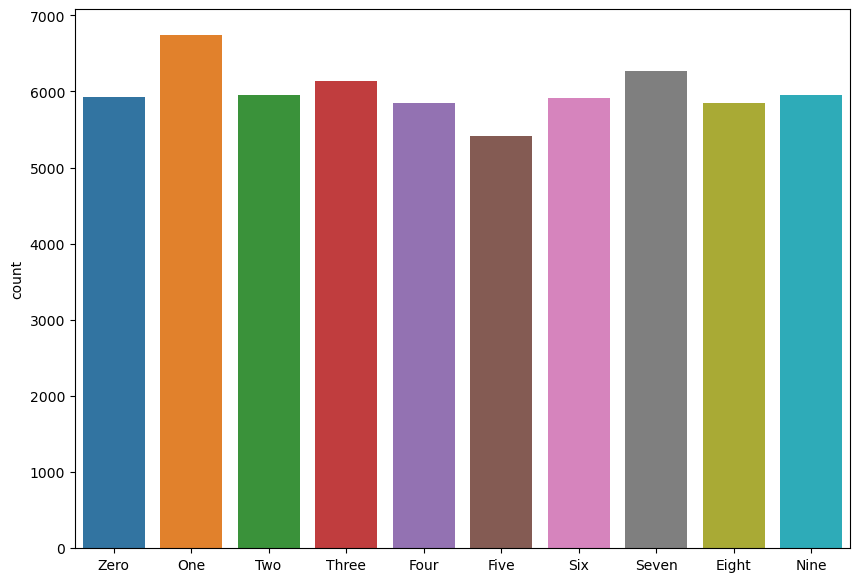

In [3]:
# Here we will check weather the dataset is balanced or we have imbalance classes.
classes = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
plt.figure(figsize=(10,7))
p = sns.countplot(y_train_full.flatten())
p.set(xticklabels=classes)
print("The image shows that we are not dealing with the problem of imbalance dataset")

In [4]:
# Checking weather we have Nan values in our dataset
print("There is Nan value in x_train_full:", np.isnan(x_train_full).any())
print("There is Nan value in y_train_full:", np.isnan(y_train_full).any())
print("There is Nan value in x_test:", np.isnan(x_train_full).any())
print("There is Nan value in y_train:", np.isnan(x_train_full).any())

print("\nThere is no missing value in the dataset.")

There is Nan value in x_train_full: False
There is Nan value in y_train_full: False
There is Nan value in x_test: False
There is Nan value in y_train: False

There is no missing value in the dataset.


In [5]:
# Converting the labels to categorical values
print("Example before converting to categorical:", y_train_full[0])
y_train_full = to_categorical(y_train_full)
y_test = to_categorical(y_test)
print("Example after converting to categorical:", y_train_full[0])

Example before converting to categorical: 5
Example after converting to categorical: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# checking the size and type of the dataset
print("x_train_full shape:", x_train_full.shape)
print("y_train_full shape:", y_train_full.shape)
print("x_train_full data type:", x_train_full.dtype)

x_train_full shape: (60000, 28, 28, 1)
y_train_full shape: (60000, 10)
x_train_full data type: uint8


In [7]:
# normalizing the training data and spliting the data into trian and validation sets
print("min and max value of the original dataset are:", np.min(x_train_full), ",", np.max(x_train_full))
x_test = x_test / 255.0
x_valid = x_train_full[:5000] / 255.0
x_train = x_train_full[5000:] / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
print("min and max value of the normalized dataset are:", np.min(x_train), ",", np.max(x_train))

min and max value of the original dataset are: 0 , 255
min and max value of the normalized dataset are: 0.0 , 1.0


In [8]:
# checking the size of training and validation sets
print("Training set dimension:", x_train.shape)
print("Validation set dimensions:", x_valid.shape)

Training set dimension: (55000, 28, 28, 1)
Validation set dimensions: (5000, 28, 28, 1)


Plotting a sample image:
7


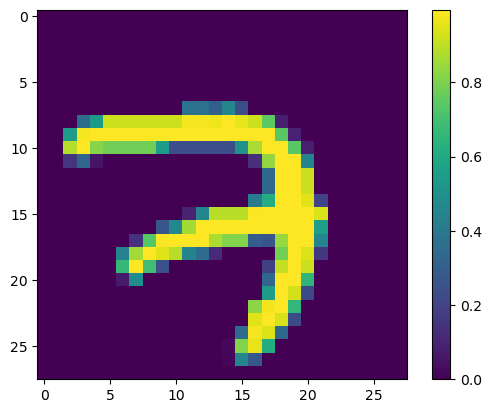

In [9]:
#Visualizing a sample
print("Plotting a sample image:")
print(np.argmax(y_train[0]))
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

plotting the fist 4 samples:


<Figure size 600x600 with 0 Axes>

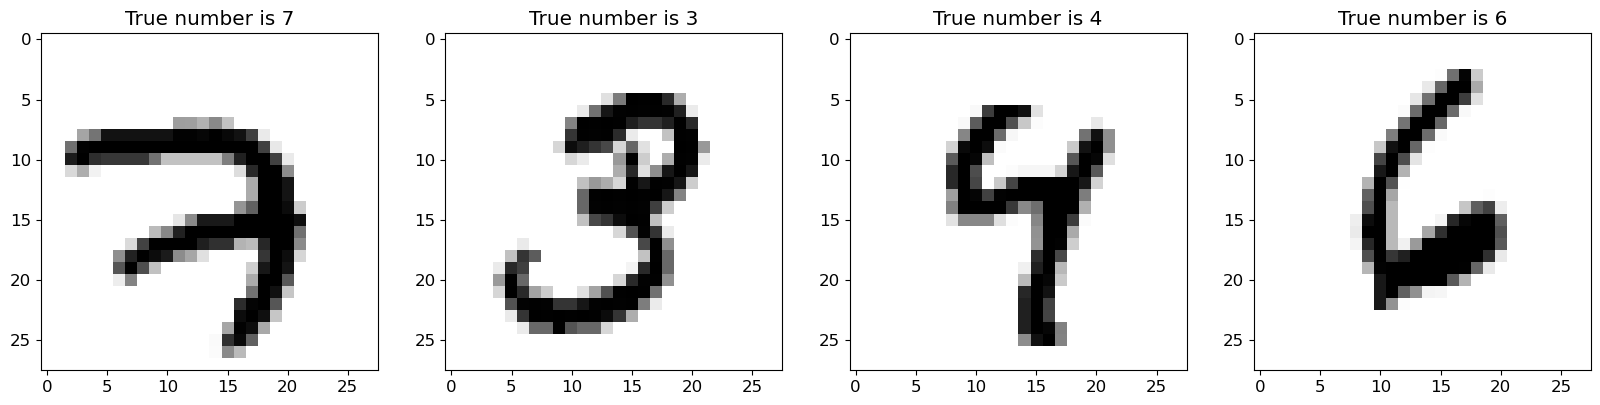

In [10]:
print("plotting the fist 4 samples:")
plt.figure(figsize=(6,6))
plt.rc('font', size=12)
x_train__ = x_train.reshape(x_train.shape[0], 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"True number is {digit}")

***
BatchNormalization layer is a layer that normalizes its inputs.

Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

Importantly, batch normalization works differently during training and during inference.


For more information, please visit:
https://keras.io/api/layers/normalization_layers/batch_normalization/
***

In [11]:
# Designing the model architecture

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())    

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

display(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

None

In [12]:
print("Displaying all the layers of the model:")
display(model.layers)

Displaying all the layers of the model:


***
### Two types of callback will be utilized here:

- EarlyStoping (loss_monitoring): Stop training when a monitored metric has stopped improving.
- ReduceLROnPlateau (reduce_lr): Reduce learning rate when a metric has stopped improving.


#### EarlyStopping
Args:
- min_delta	Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- patience	Number of epochs with no improvement after which training will be stopped.
- verbose	Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
- mode	One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the - direction is automatically inferred from the name of the monitored quantity.
- baseline	Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
- restore_best_weights	Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

Reference: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


#### ReduceLROnPlateau

Args:
- monitor:	quantity to be monitored.
- factor:	factor by which the learning rate will be reduced. new_lr = lr * factor.
- patience:	number of epochs with no improvement after which learning rate will be reduced.
- verbose:	int. 0: quiet, 1: update messages.
- mode:	one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta:	threshold for measuring the new optimum, to only focus on significant changes.
- cooldown:	number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr:	lower bound on the learning rate.

Reference: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
***

### Using adam as the optimizer

In [13]:
model.compile(loss="categorical_crossentropy",
            optimizer="RMSProp",
            metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", # metrics to monitor
        patience=5, # how many epochs before stop
        verbose=1,
        mode="min", # we need the minimum loss
        restore_best_weights=True,
     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="min",
        min_lr=0.00001,
     )

num_batch_size = 1024
num_epochs = 20000

print(f"Optimizer, metrics, early stopping, learning rate reduction, number of batch size, and number of epochs were set.")

Optimizer, metrics, early stopping, learning rate reduction, number of batch size, and number of epochs were set.


In [14]:
# Training the model and evaluating the model
history = model.fit(
            x_train,
            y_train,
            batch_size=num_batch_size,
            epochs=num_epochs,
            verbose=1,
            callbacks=[callback, reduce_lr],
            validation_data=(x_valid, y_valid),
        )
test_loss, test_acc = model.evaluate(x_valid, y_valid, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/20000
54/54 [==============================] - 19s 108ms/step - loss: 0.2381 - accuracy: 0.9243 - val_loss: 3.2798 - val_accuracy: 0.1126
Epoch 2/20000
54/54 [==============================] - 3s 64ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 4.6741 - val_accuracy: 0.1126
Epoch 3/20000
54/54 [==============================] - 3s 63ms/step - loss: 0.0347 - accuracy: 0.9900 - val_loss: 8.1916 - val_accuracy: 0.1126
Epoch 4/20000
54/54 [==============================] - 3s 64ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 6.6899 - val_accuracy: 0.1126

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/20000
54/54 [==============================] - 3s 64ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 6.6386 - val_accuracy: 0.1126
Epoch 6/20000
54/54 [==============================] - 3s 64ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 7.0872 - val_accuracy: 0.1126
Epoch 7/20000
54/54 [==============================]

In [19]:
print("history.params.keys():", history.params.keys())
print("Number of epochs:", len(history.epoch))
print("history.history.keys():", history.history.keys())

history.params.keys(): dict_keys(['verbose', 'epochs', 'steps'])
Number of epochs: 26
history.history.keys(): dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


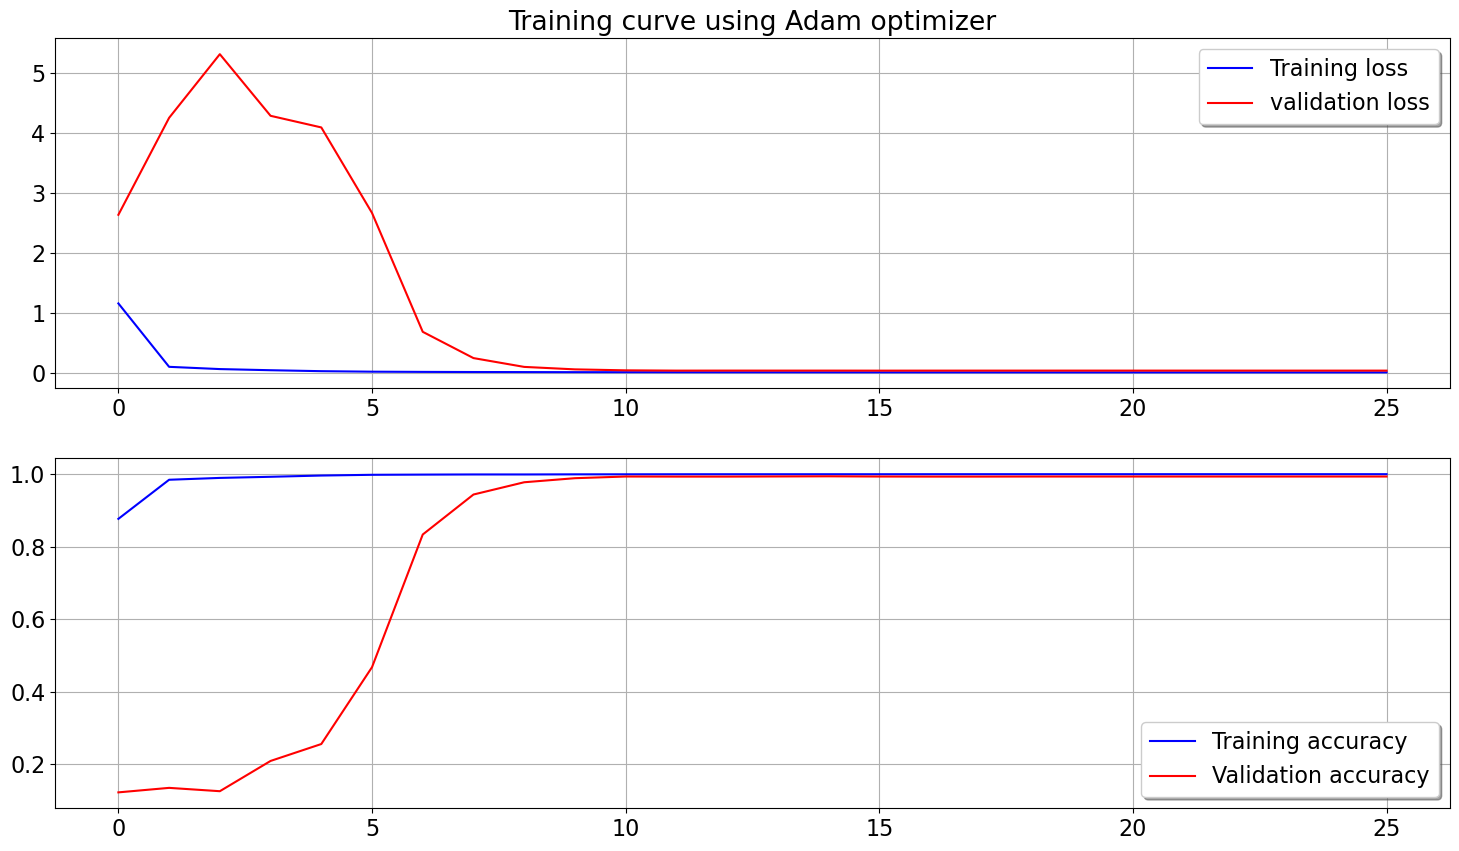

In [47]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
plt.rc('font', size=16)
ax[0].title.set_text("Training curve using Adam optimizer")
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].grid()
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [21]:
print("Evaluation of the model on the training set")
model.evaluate(x_train, y_train)

Evaluation of the model on the training set
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9996


[0.004664972424507141, 0.9995636343955994]

In [22]:
print("Evaluation of the model on the validation set")
model.evaluate(x_valid, y_valid)

Evaluation of the model on the validation set
157/157 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9932


[0.03286601975560188, 0.9932000041007996]

In [23]:
print("Evaluation of the model on the test set")
model.evaluate(x_test, y_test)

Evaluation of the model on the test set
313/313 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9945


[0.02915453538298607, 0.9944999814033508]

In [24]:
# Example: Predicting three samples
x_new = x_test[:3]
y_pred = model.predict(x_new)
print("Probability of predicted numbers:\n", y_pred)
print("Closest match for the predicted numbers:\n", np.argmax(y_pred, axis=1))

Probability of predicted numbers:
 [[2.6292366e-05 1.7715378e-04 4.2782363e-04 2.1665441e-04 1.8132028e-04
  2.4351332e-04 2.1398650e-05 9.9838412e-01 1.8845248e-04 1.3328815e-04]
 [1.8061454e-04 1.1367060e-04 9.9863333e-01 2.0958987e-04 2.5006162e-04
  3.4180557e-05 2.3669792e-05 2.5597456e-04 2.5500043e-04 4.3819367e-05]
 [9.1413865e-05 9.9864131e-01 1.2531597e-04 7.6423450e-05 1.8950173e-04
  8.6659093e-05 1.4739155e-04 1.6730442e-04 1.0809930e-04 3.6659054e-04]]
Closest match for the predicted numbers:
 [7 2 1]


In [25]:
# saving the model
model.save("cnn_mnist_model.h5", save_format="h5")

In [27]:
# loading the model
model = tf.keras.models.load_model("cnn_mnist_model.h5")

# making predictions on test images (all of them)
y_predict = model.predict(x_valid)

# display prediction for the first seven image
print("Validation predicted values:", np.argmax(y_predict, axis=1)[:7])

#We can also print out a test label and see if prediction is correct
print("Validation true labels:", np.argmax(y_valid[:7], axis=1))

Validation predicted values: [5 0 4 1 9 2 1]
Validation true labels: [5 0 4 1 9 2 1]


In [28]:
# evaluating the model performance on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {} %'.format(score[0] * 100))
print('Test accuracy: {} %'.format(score[1] * 100))

Test loss: 2.915453538298607 %
Test accuracy: 99.44999814033508 %


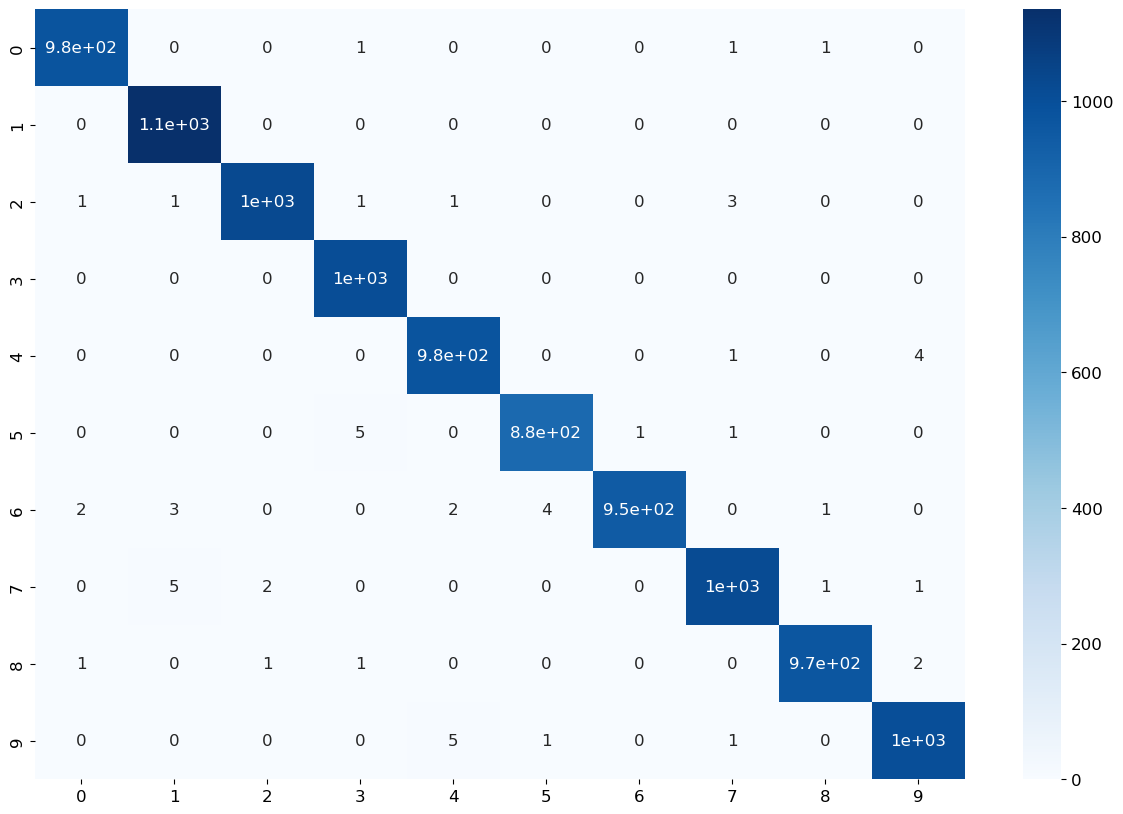

In [29]:
# checking the confusion matrix of all classes
plt.figure(figsize=(15,10))
plt.rc('font', size=12)
y_predict = model.predict(x_test)
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

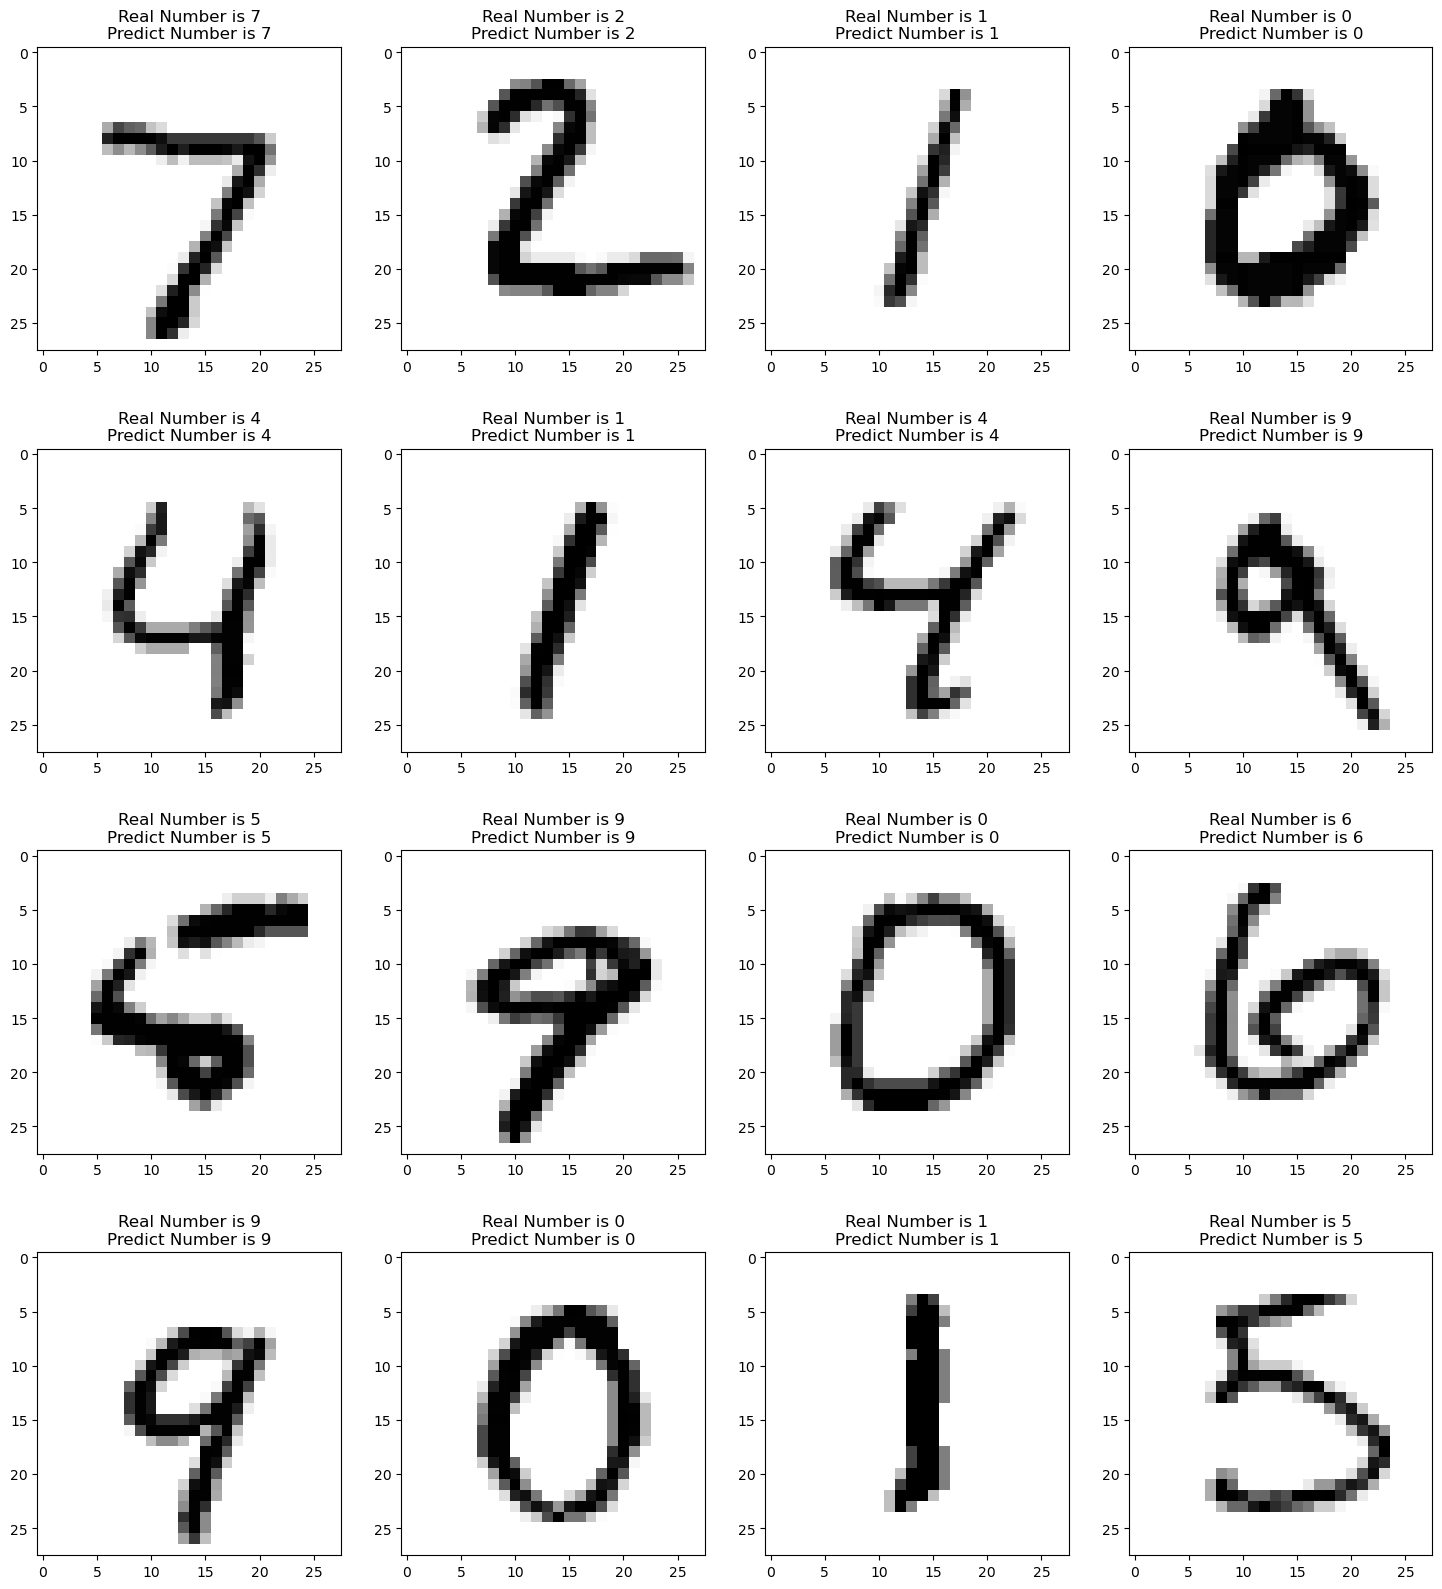

In [30]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)
plt.rc('font', size=10)
fig, axis = plt.subplots(4, 4, figsize=(18, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}")

***
#### Other important metrics for classification:
- Compute precision, recall, F-measure and support for each class.

- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- F1 = 2 * (precision * recall) / (precision + recall)
- The support is the number of occurrences of each class in y_true.

References: 
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
***

In [31]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Accessing the weights of the model

In [32]:
print("Model weights:")
print(model.get_weights())

Model weights:
[array([[[[ 8.70328397e-03,  9.80002433e-02,  2.27313116e-02,
          -2.90358458e-02, -5.35266809e-02, -3.24680619e-02,
          -9.39920619e-02, -7.71091133e-02,  1.01999991e-01,
           3.03818751e-02,  4.73730043e-02,  4.21784744e-02,
          -1.13455907e-01,  5.85789829e-02, -1.25064671e-01,
          -4.32903320e-02, -4.37835455e-02, -2.69228630e-02,
          -6.99341819e-02, -9.80257019e-02,  6.53074495e-03,
          -1.34198111e-03, -8.01407993e-02,  1.41524859e-02,
          -1.35076186e-02,  3.16270031e-02,  6.10960461e-02,
          -2.33834106e-02, -2.18263511e-02,  9.36775655e-02,
           2.02807758e-04,  1.10720575e-01,  4.69225682e-02,
          -7.80242607e-02,  2.37995815e-02,  1.43788774e-02,
          -5.58133386e-02, -1.27096167e-02,  2.93444898e-02,
           6.56514689e-02,  2.72633526e-02, -4.39804532e-02,
          -9.40686651e-03,  6.45926446e-02,  1.56607088e-02,
           8.48247930e-02, -4.40797135e-02,  3.77263874e-02,
        

In [33]:
print("Dimension of model weights:", len(model.get_weights()))

for i in range(len(model.get_weights())):
    print(np.shape(model.get_weights()[i]))

Dimension of model weights: 32
(3, 3, 1, 64)
(64,)
(3, 3, 64, 64)
(64,)
(64,)
(64,)
(64,)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(128,)
(128,)
(128,)
(128,)
(3, 3, 128, 256)
(256,)
(256,)
(256,)
(256,)
(256,)
(256, 512)
(512,)
(512, 10)
(10,)
(10, 300)
(300,)
(300, 100)
(100,)
(100, 10)
(10,)


### Using RMSprop as the optimizer

In [34]:
# Designing the model architecture

rmsprop_model = keras.models.Sequential()

rmsprop_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
rmsprop_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
rmsprop_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
rmsprop_model.add(tf.keras.layers.BatchNormalization())

rmsprop_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
rmsprop_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
rmsprop_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
rmsprop_model.add(tf.keras.layers.BatchNormalization())    

rmsprop_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
rmsprop_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
rmsprop_model.add(tf.keras.layers.BatchNormalization())
    
rmsprop_model.add(tf.keras.layers.Flatten())
rmsprop_model.add(tf.keras.layers.Dense(512,activation="relu"))
    
rmsprop_model.add(tf.keras.layers.Dense(10,activation="softmax"))

rmsprop_model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
rmsprop_model.add(tf.keras.layers.Dense(300, activation="relu"))
rmsprop_model.add(tf.keras.layers.Dense(100, activation="relu"))
# last layer
rmsprop_model.add(tf.keras.layers.Dense(10, activation="softmax"))

display(rmsprop_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)        

None

In [36]:
# Setting loss function, optimizer, and evaluation metric
rmsprop_model.compile(loss="categorical_crossentropy",
            optimizer="RMSprop",
            metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", 
        patience=10, 
        verbose=1,
        mode="min",
        restore_best_weights=True,
     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="min",
        min_lr=0.00001,
     )

num_batch_size = 1024
num_epochs = 20000
print(f"Optimizer, metrics, early stopping, learning rate reduction, number of batch size, and number of epochs were set.")

Optimizer, metrics, early stopping, learning rate reduction, number of batch size, and number of epochs were set.


In [37]:
# Training the rmsprop_model and evaluating the rmsprop_model
rmsprop_history = rmsprop_model.fit(
            x_train,
            y_train,
            batch_size=num_batch_size,
            epochs=num_epochs,
            verbose=1,
            callbacks=[callback, reduce_lr],
            validation_data=(x_valid, y_valid),
        )
test_loss, test_acc = rmsprop_model.evaluate(x_valid, y_valid, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/20000
54/54 [==============================] - 5s 66ms/step - loss: 1.2767 - accuracy: 0.4697 - val_loss: 2.3264 - val_accuracy: 0.1270
Epoch 2/20000
54/54 [==============================] - 3s 62ms/step - loss: 0.7541 - accuracy: 0.5757 - val_loss: 6.1821 - val_accuracy: 0.1126
Epoch 3/20000
54/54 [==============================] - 3s 61ms/step - loss: 0.4282 - accuracy: 0.7986 - val_loss: 2.2133 - val_accuracy: 0.1944
Epoch 4/20000
54/54 [==============================] - 3s 60ms/step - loss: 0.1607 - accuracy: 0.9567 - val_loss: 3.0996 - val_accuracy: 0.2362
Epoch 5/20000
54/54 [==============================] - 3s 59ms/step - loss: 0.0465 - accuracy: 0.9907 - val_loss: 6.4321 - val_accuracy: 0.1314
Epoch 6/20000
54/54 [==============================] - 3s 59ms/step - loss: 0.0336 - accuracy: 0.9926 - val_loss: 2.7594 - val_accuracy: 0.4148

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 7/20000
54/54 [==============================] -

In [38]:
print("rmsprop_history.params.keys():", rmsprop_history.params.keys())
print("rmsprop_history.epoch:", len(rmsprop_history.epoch))
print("rmsprop_history.epoch:", rmsprop_history.history.keys())

rmsprop_history.params.keys(): dict_keys(['verbose', 'epochs', 'steps'])
rmsprop_history.epoch: 24
rmsprop_history.epoch: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


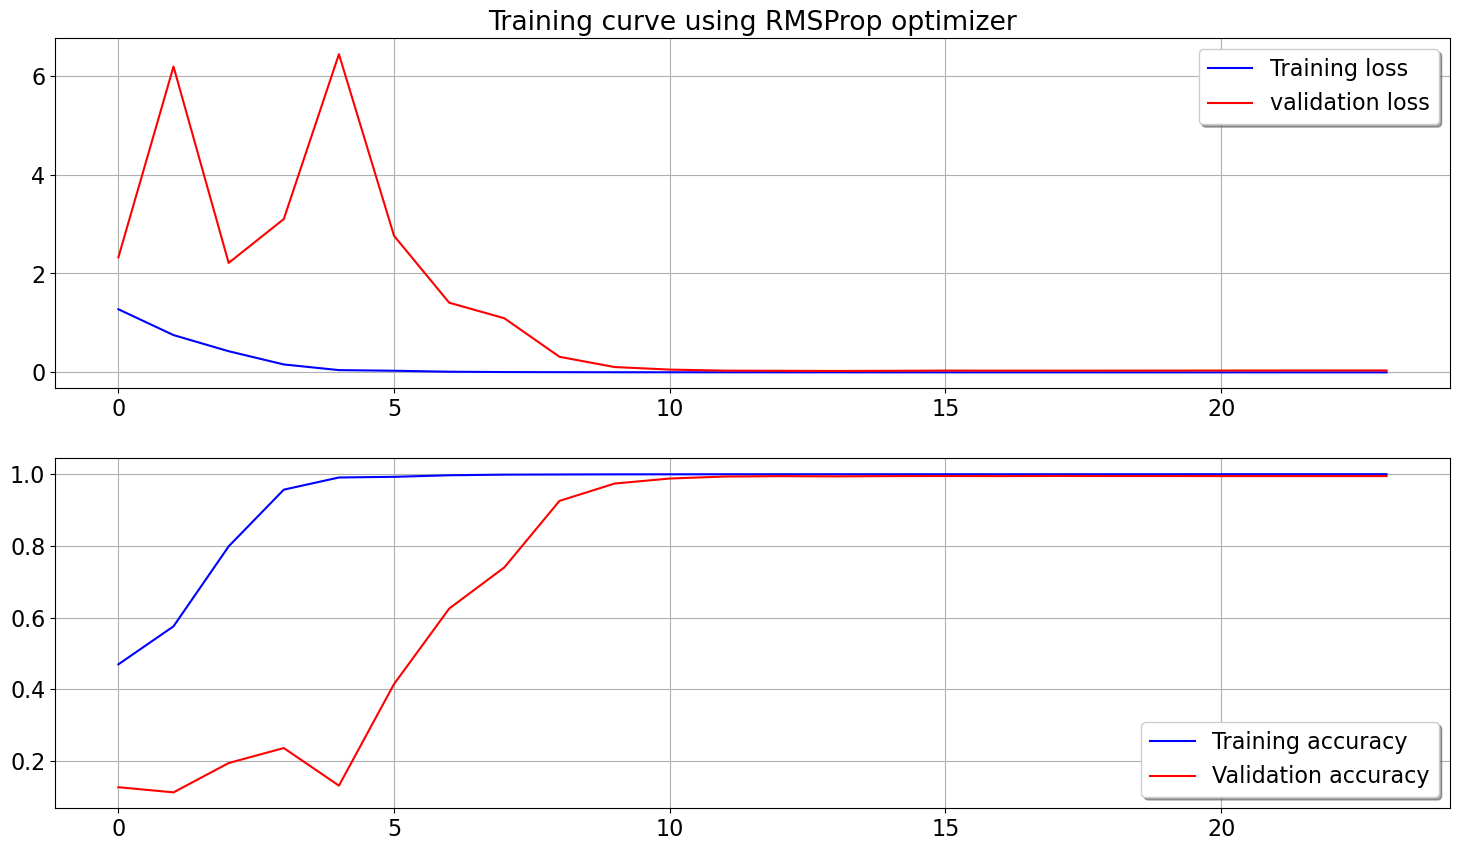

In [46]:
# Plot the loss and accuracy curves for training and validation 
plt.rc('font', size=16)
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].title.set_text("Training curve using RMSProp optimizer")
ax[0].plot(rmsprop_history.history['loss'], color='b', label="Training loss")
ax[0].plot(rmsprop_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].grid()
ax[1].plot(rmsprop_history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(rmsprop_history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [40]:
print("Evaluation of the rmsprop_model on the training set")
rmsprop_model.evaluate(x_train, y_train)

Evaluation of the rmsprop_model on the training set
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.9998


[0.001825437881052494, 0.9997818470001221]

In [41]:
print("Evaluation of the rmsprop_model on the test set")
rmsprop_model.evaluate(x_test, y_test)

Evaluation of the rmsprop_model on the test set
313/313 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9944


[0.03183160349726677, 0.9944000244140625]

In [42]:
print("Evaluation of the rmsprop_model on the validation set")
rmsprop_model.evaluate(x_valid, y_valid)

Evaluation of the rmsprop_model on the validation set
157/157 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9938


[0.028888177126646042, 0.9937999844551086]

In [43]:
# making predictions on test images (all of them)
y_predict_rmsprop = rmsprop_model.predict(x_valid)

# display prediction for the first seven image
print("Validation prediction values:", np.argmax(y_predict_rmsprop, axis=1)[:7])

#We can also print out a test label and see if prediction is correct
print("Validation true labels:", np.argmax(y_valid[:7], axis=1))

Validation prediction values: [5 0 4 1 9 2 1]
Validation true labels: [5 0 4 1 9 2 1]


In [44]:
# evaluating the model performance on test data
rmsprop_score = rmsprop_model.evaluate(x_test, y_test, verbose=0)
print('rmsprop_model test loss: {} %'.format(rmsprop_score[0] * 100))
print('rmsprop_model test accuracy: {} %'.format(rmsprop_score[1] * 100))

rmsprop_model test loss: 3.183160349726677 %
rmsprop_model test accuracy: 99.44000244140625 %


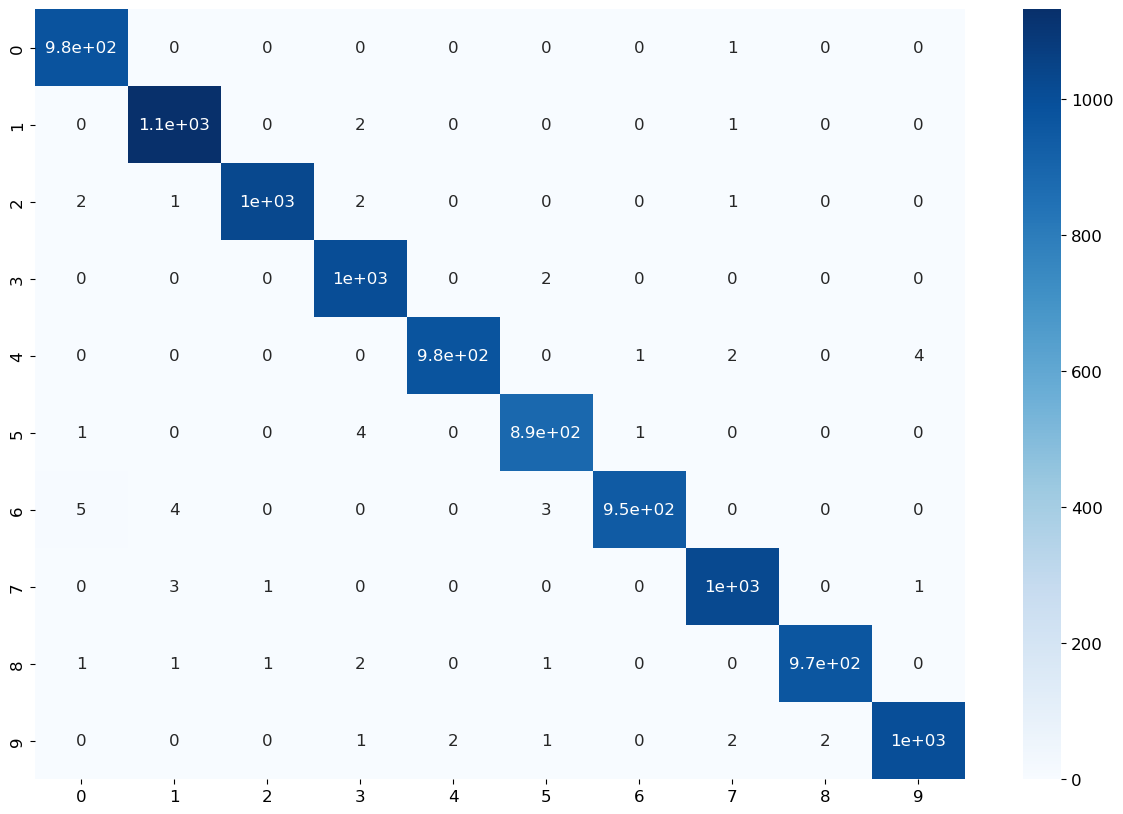

In [48]:
# checking the confusion matrix of all classes
plt.rc('font', size=12)
plt.figure(figsize=(15,10))
y_predict_rmsprop = rmsprop_model.predict(x_test)
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_predict_rmsprop, axis=1))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [49]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict_rmsprop, axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



***
### Conclusion:
In our case the same model with RMSProp converged a little bit faster and gained about 0.1% higher accuracy compare with the model which was trained using Adam optimizer.
***